### Import de librerias

In [311]:

%matplotlib inline 
import matplotlib.pyplot as plt 

import numpy as np ; np.random.seed(sum(map(ord, "aesthetics")))
import pandas as pd



from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler,OrdinalEncoder
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns



import seaborn 
seaborn.set_context('notebook') 
seaborn.set_style(style='darkgrid')

from pprint import pprint 
 


In [274]:
file = 'data/germancreditdata/german.data'

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

data = pd.read_csv(file,names = names, delimiter=' ')
print(data.shape)
print (data.columns)
data.head(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


## Comprobamos los datos que son missing


In [267]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,classification,otherdebtors,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,...,foreignworker,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,existingchecking
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Como se puede comprobar no hay ningun valor que sea nulo por lo que no hace falta limpiar el dataset en ese as pecto

Ahora comprobaremos las correlacion entre las variables

In [269]:
data.corr()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,classification
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
creditamount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
installmentrate,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
residencesince,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
existingcredits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
peopleliable,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
classification,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


In [278]:

data.classification.replace([1,2], [1,0], inplace=True)


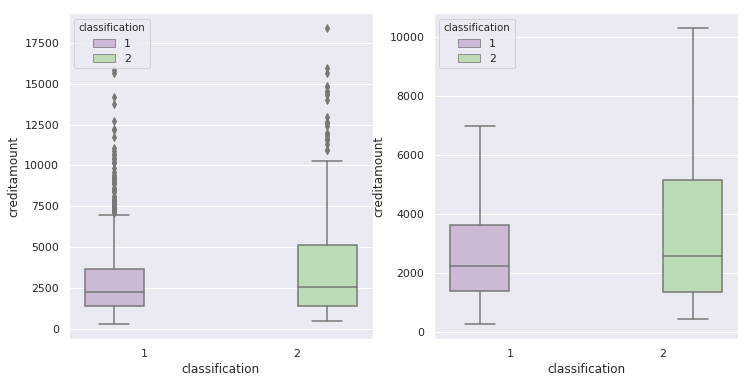

In [277]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="classification", y="creditamount", hue="classification",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="classification", y="creditamount", hue="classification",data=data, palette="PRGn",showfliers=False)
plt.show();

### StandardScaler

Lo que haremos sera estandarizar las varibles que son numericas para saber que todas esten en un mismo rango

In [284]:
#variables numericas


numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']

# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars].drop(['classification'], axis=1)))

### Variables categoricas 

Transformamos las variables categoricas a variables que puedan ser interpretadas por el programa con la funcion get dummies.

In [297]:
from collections import defaultdict

# Variables que son categoricas
variavlesCategoricas = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']

d = defaultdict(LabelEncoder)

lecatdata = data[variavlesCategoricas].apply(lambda x: d[x.name].fit_transform(x))

dummyvars = pd.get_dummies(data[variavlesCategoricas])
lecatdata_std = pd.DataFrame(StandardScaler().fit_transform(lecatdata[variavlesCategoricas]))



In [300]:
data_clean = pd.concat([data[numvars], dummyvars], axis = 1)
print(data_clean.shape)

(1000, 62)


In [299]:
data_clean_labeled = pd.concat([data[numvars], lecatdata_std], axis = 1)
print(data_clean_labeled.shape)

(1000, 21)


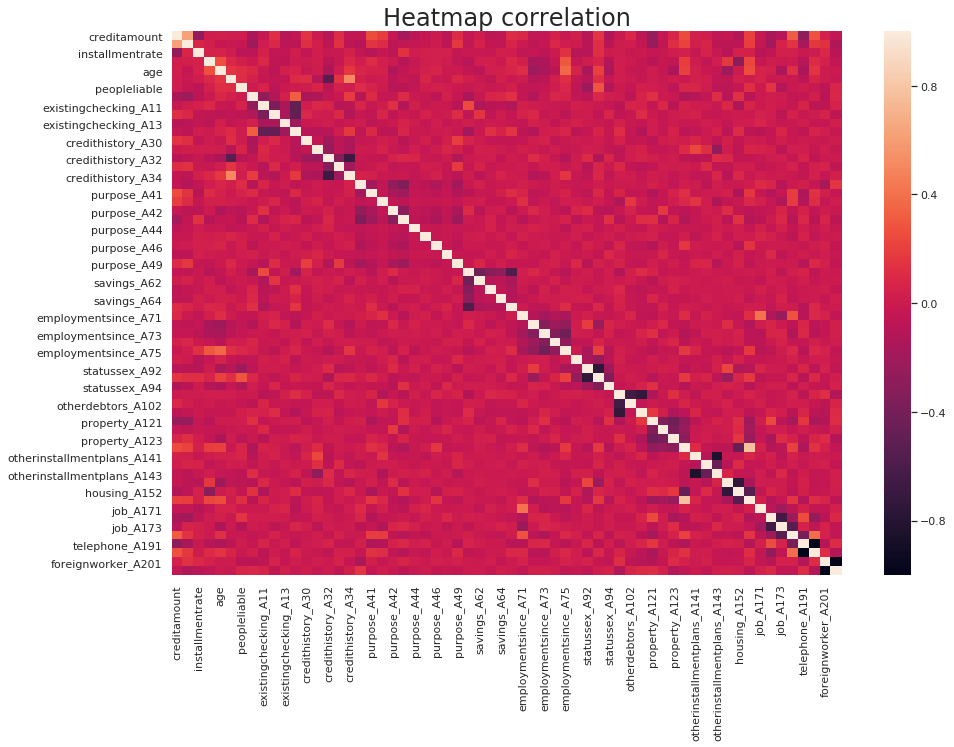

In [301]:
df_corr = data_clean.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr)
seaborn.set(font_scale=2)
plt.title('Heatmap correlation')
plt.show()

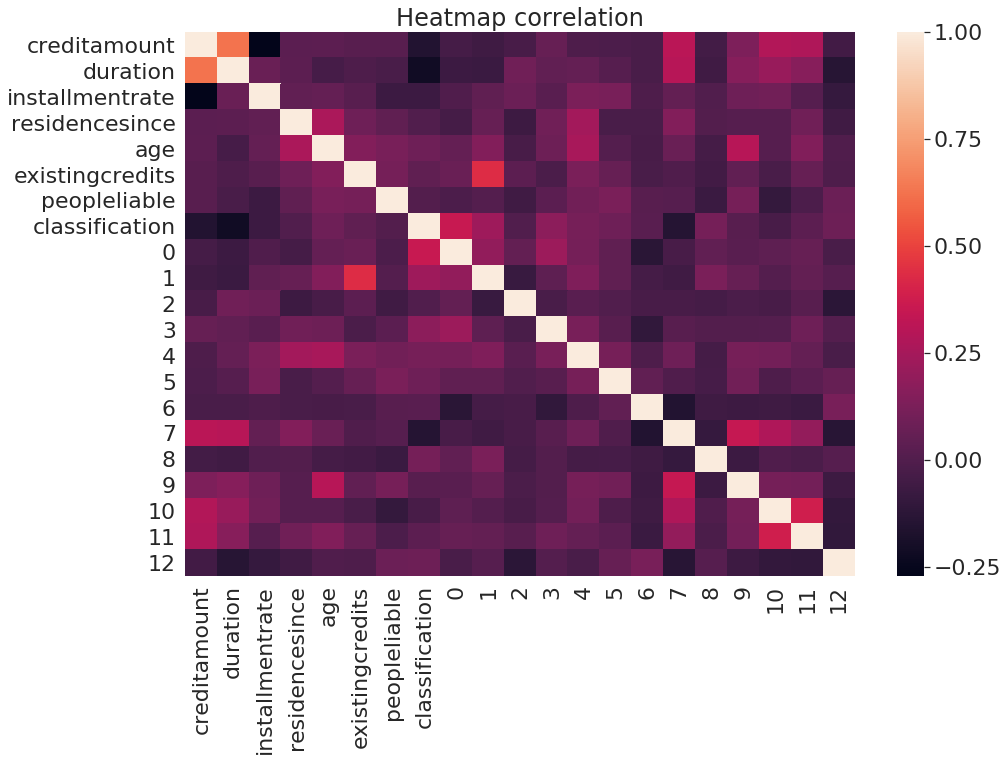

In [302]:
df_corr_labeled =data_clean_labeled.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr_labeled)
seaborn.set(font_scale=2)
plt.title('Heatmap correlation')
plt.show()

### Dividimos el daset en train and clean

In [303]:
X_clean = data_clean.drop('classification', axis=1)
y_clean = data_clean['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.2, random_state=1)

In [304]:
X_clean_labeled = data_clean_labeled.drop('classification', axis=1)
y_clean_labeled = data_clean_labeled['classification']
X_train_clean_labeled, X_test_clean_labeled, y_train_clean_labeled, y_test_clean_labeled = train_test_split(X_clean_labeled,y_clean_labeled,test_size=0.2, random_state=4)

In [305]:
X_train_clean_labeled.keys()

Index([   'creditamount',        'duration', 'installmentrate',
        'residencesince',             'age', 'existingcredits',
          'peopleliable',                 0,                 1,
                       2,                 3,                 4,
                       5,                 6,                 7,
                       8,                 9,                10,
                      11,                12],
      dtype='object')

In [306]:
X_train_clean_labeled.describe()

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,0,1,2,3,4,5,6,7,8,9,10,11,12
count,800.000000,800.000000,800.0000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,3251.312500,20.851250,2.9925,2.831250,35.35125,1.401250,1.156250,0.006364,-0.002309,0.007944,-0.004749,-0.008487,0.002473,0.018326,-0.021911,0.008862,0.011299,-0.002296,-0.003057,0.015893
std,2838.554289,12.124887,1.1131,1.110998,11.09501,0.570662,0.363319,0.994338,1.002212,1.000340,0.992876,0.991327,0.998486,1.032246,1.019045,0.990285,0.998522,1.004965,1.000022,1.038779
min,250.000000,4.000000,1.0000,1.000000,19.00000,1.000000,1.000000,-1.254566,-2.350870,-1.196889,-0.699707,-1.973997,-2.376626,-0.303686,-1.293723,-2.375050,-1.749535,-2.914492,-0.823318,-0.196014
25%,1363.250000,12.000000,2.0000,2.000000,27.00000,1.000000,1.000000,-1.254566,-0.503428,-0.831650,-0.699707,-0.317959,-0.963650,-0.303686,-1.293723,0.460831,0.133710,0.146949,-0.823318,-0.196014
50%,2290.000000,18.000000,3.0000,3.000000,33.00000,1.000000,1.000000,-0.459026,-0.503428,-0.101171,-0.699707,-0.317959,0.449326,-0.303686,-0.341055,0.460831,0.133710,0.146949,-0.823318,-0.196014
75%,3941.500000,24.000000,4.0000,4.000000,41.25000,2.000000,1.000000,1.132053,1.344014,0.264068,0.566731,0.510060,0.449326,-0.303686,0.611613,0.460831,0.133710,0.146949,1.214598,-0.196014
max,18424.000000,60.000000,4.0000,4.000000,74.00000,4.000000,2.000000,1.132053,1.344014,2.090264,1.833169,1.338078,1.862303,3.885083,1.564281,0.460831,2.016956,1.677670,1.214598,5.101669


In [307]:
print(X_train_clean_labeled.shape)
print(X_test_clean_labeled.shape)
print(y_train_clean_labeled.shape)
print(y_train_clean_labeled.shape)

(800, 20)
(200, 20)
(800,)
(800,)


In [321]:
print(X_train_clean.shape)
print(X_test_clean.shape)
print(y_train_clean.shape)
print(y_train_clean.shape)

(800, 61)
(200, 61)
(800,)
(800,)


In [308]:
X_train_clean.keys()

Index(['creditamount', 'duration', 'installmentrate', 'residencesince', 'age',
       'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'employmentsince_A71', 'employmentsince_A72',
       'employmentsince_A73', 'employmentsince_A74', 'employmentsince_A75',
       'statussex_A91', 'statussex_A92', 'statussex_A93', 'statussex_A94',
       'otherdebtors_A101', 'otherdebtors_A102', 'otherdebtors_A103',
       'property_A121', 'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A

In [143]:
X_train_clean.describe()

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking_A11,existingchecking_A12,existingchecking_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,3214.083750,20.852500,2.967500,2.852500,35.468750,1.406250,1.145000,0.276250,0.271250,0.061250,...,0.700000,0.110000,0.022500,0.190000,0.636250,0.151250,0.603750,0.396250,0.962500,0.037500
std,2769.417585,11.744815,1.123843,1.090748,11.428902,0.573692,0.352321,0.447422,0.444883,0.239938,...,0.458544,0.313085,0.148396,0.392546,0.481379,0.358517,0.489423,0.489423,0.190102,0.190102
min,250.000000,4.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1344.750000,12.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2281.500000,18.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,3966.750000,24.000000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,18424.000000,60.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [317]:
# Function for evaluation reports

def get_eval(clf, X,y):
    kfold = KFold(n_splits=6, random_state=2012)
    scores = cross_val_score(clf, X, y, cv=kfold, scoring='roc_auc')
    # La media de los scores anteriores y su desviacion
    print("Validacion cruzada: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
    return 

  
# Funcion que da la curva ROC
def get_roc (y_test,y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Ranking de falsos positivos')
    plt.ylabel('Ranking de vardaros positivos')
    plt.legend(loc="upper left")
    plt.show()
    return

In [398]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import xgboost as xgb
from xgboost import XGBClassifier
#print('XGBoost v',xgb.__version__)

def xgbclf(params, X_train, y_train,X_test, y_test):
  
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    model = XGBClassifier(**params).\
      fit(X_train, y_train, eval_set=eval_set, \
                  eval_metric='auc', early_stopping_rounds = 100, verbose=100)
        
  
    model.set_params(**{'n_estimators': model.best_ntree_limit})
    model.fit(X_train, y_train)
    #print(model,'\n')
    
    # Prediccion de la variable objetivo.
    y_pred = model.predict(X_test, ntree_limit=model.best_ntree_limit) 
   
    # Hacer la crooss validation
    get_eval(model, X_train, y_train)
  
    
    # Creacion de martiz de confusion  
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)

    
    # Predecir las variables
    y_pred_proba = model.predict_proba(X_test, ntree_limit=model.best_ntree_limit)[:,1] #model.best_iteration
    get_roc (y_test,y_pred_proba)
    return model

def plot_featureImportance(model, keys):
  importances = model.feature_importances_

  importance_frame = pd.DataFrame({'Importancia': list(importances), 'Feature': list(keys)})
  importance_frame.sort_values(by = 'Importancia', inplace = True)
  importance_frame.tail(10).plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'blue')

### XGBoost  

[0]	validation_0-auc:0.761589	validation_1-auc:0.692451
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.947201	validation_1-auc:0.735064
[0 1]
Validacion cruzada: 0.78 (+/- 0.03)
[[ 24  35]
 [ 13 128]]
              precision    recall  f1-score   support

           0       0.65      0.41      0.50        59
           1       0.79      0.91      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200



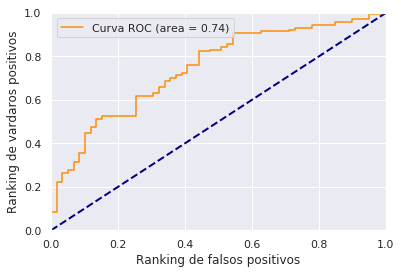

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=51, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [347]:
params={}
xgbclf(params, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

El primer modelo vemos que es con validacion cruzada tiene un score de 9.78 y sin validacion solo training testes de un 0.74

### XGBoost  1

[0]	validation_0-auc:0.636443	validation_1-auc:0.522899
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.893289	validation_1-auc:0.788076
Stopping. Best iteration:
[48]	validation_0-auc:0.868964	validation_1-auc:0.790119

Validacion cruzada: 0.78 (+/- 0.02)
[[ 10  49]
 [  2 139]]
              precision    recall  f1-score   support

           0       0.83      0.17      0.28        59
           1       0.74      0.99      0.84       141

    accuracy                           0.74       200
   macro avg       0.79      0.58      0.56       200
weighted avg       0.77      0.74      0.68       200



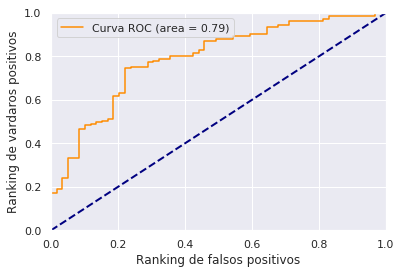

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=49, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [373]:
params={}

params1={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.3,
    'min_child_weight':3,
    'max_depth':3,
    'n_jobs' : -1
}

xgbclf(params1, X_train_clean, y_train_clean, X_test_clean, y_test_clean)

Con este modelo hemos conseguifo que sea un modelo que tiene una AUC de 0.79 y con validacion cruzada cerca de 0.77

<a id="Dataset"></a> <br>


In [335]:
# Separamos los datos en train y dataset
X_train_clean_res = pd.DataFrame(X_train_clean_res, columns=X_train_clean.keys())


In [354]:
print(np.shape(X_train_clean_res))
print(np.shape(y_train_clean_res))
print(np.shape(X_test_clean)) 
print(np.shape(y_test_clean))

(1118, 61)
(1118,)
(200, 61)
(200,)


In [337]:
X_train_clean_res.describe()

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable,existingchecking_A11,existingchecking_A12,existingchecking_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,...,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,3490.184258,21.958855,2.928444,2.760286,34.919499,1.336315,1.113596,0.256708,0.229875,0.043828,...,0.602862,0.088551,0.016995,0.147585,0.573345,0.120751,0.559034,0.340787,0.963327,0.026834
std,3077.622234,11.725375,1.097028,1.040693,10.920349,0.538197,0.317462,0.437013,0.420940,0.204804,...,0.489524,0.284222,0.129309,0.354847,0.494813,0.325984,0.496725,0.474186,0.188041,0.161669
min,250.000000,4.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1344.250000,12.000000,2.000000,2.000000,26.250000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2384.000000,20.000000,3.000000,3.000000,32.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,4303.750000,27.000000,4.000000,4.000000,41.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,18424.000000,60.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [353]:
np.unique(y_train_clean_res)

array([0, 1])

### XGBoost Labeled


[0]	validation_0-auc:0.766547	validation_1-auc:0.763313
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.946348	validation_1-auc:0.809592
Validacion cruzada: 0.79 (+/- 0.03)
[[ 27  32]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.64      0.46      0.53        59
           1       0.80      0.89      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.68      0.69       200
weighted avg       0.75      0.77      0.75       200



Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x7fa504924e80>>
Traceback (most recent call last):
  File "/home/xus/PycharmProjects/machine-learning/venv/lib/python3.5/site-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'
Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x7fa504734cc0>>
Traceback (most recent call last):
  File "/home/xus/PycharmProjects/machine-learning/venv/lib/python3.5/site-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


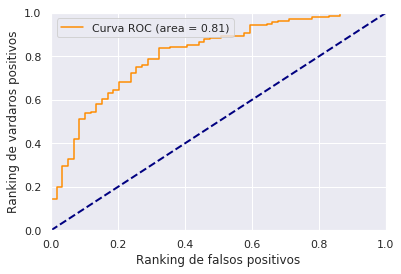

In [365]:
# modelo base
params={}
modeloLabeled = xgbclf(params,X_train_clean_labeled, y_train_clean_labeled,X_test_clean_labeled, y_test_clean_labeled)

Como vemos la estimacion con crossvalidation sale que es de un 0.79 con una descviacion tipica de un 0.3
Como es un buen modelo vamos a ver que features seran buenas para poder elegirlas.

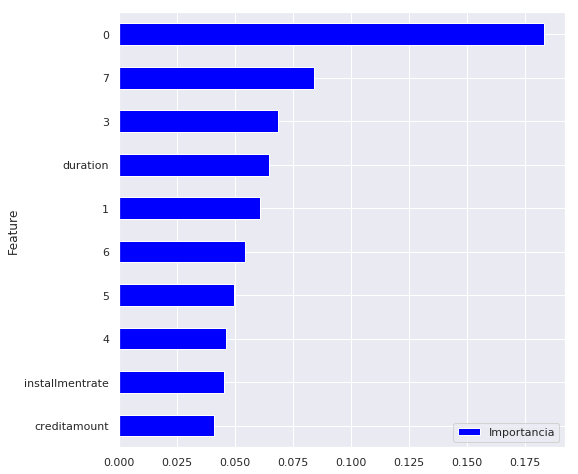

In [369]:
plot_featureImportance(modeloLabeled, X_train_clean_labeled.keys())

### XGBoost Probamos el modelo 2: 

[0]	validation_0-auc:0.636443	validation_1-auc:0.522899
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.893289	validation_1-auc:0.788076
Stopping. Best iteration:
[48]	validation_0-auc:0.868964	validation_1-auc:0.790119

Validacion cruzada: 0.78 (+/- 0.02)
[[ 10  49]
 [  2 139]]
              precision    recall  f1-score   support

           0       0.83      0.17      0.28        59
           1       0.74      0.99      0.84       141

    accuracy                           0.74       200
   macro avg       0.79      0.58      0.56       200
weighted avg       0.77      0.74      0.68       200



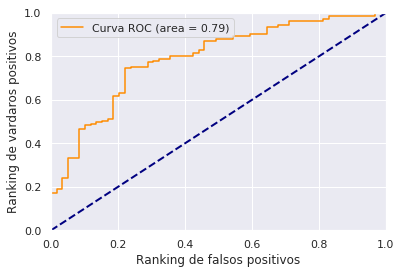

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=49, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [378]:
params = {}

params1={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.3,
    'min_child_weight':3,
    'max_depth':3,
    #'seed':1024,
    'n_jobs' : -1
}


#xgbclf(params, X_train, y_train,X_test,y_test)
model = xgbclf(params1,X_train_clean, y_train_clean,X_test_clean, y_test_clean)
model



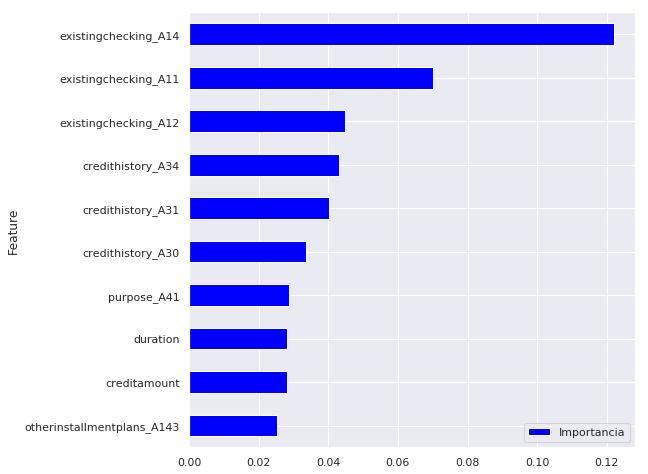

In [387]:
plot_featureImportance(model,X_train_clean.keys())

Como podemos ver la variable que es la que influye mas e la de existing checking pues en ambos modelos se ve que es la qu mas importancia tiene.

# 4.  Selccion de variables
- XGBoost3 Modelo base
- GridSearchCV 

In [394]:


importances = model.feature_importances_
importance_frame = pd.DataFrame({'Importance': list(importances), 'Feature': list(X_train_clean.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True, ascending=False)
importance_col = importance_frame.Feature.head(10).values
importance_col

array(['existingchecking_A14', 'existingchecking_A11',
       'existingchecking_A12', 'credithistory_A34', 'credithistory_A31',
       'credithistory_A30', 'purpose_A41', 'duration', 'creditamount',
       'otherinstallmentplans_A143'], dtype=object)

In [392]:
importances_labeled = modeloLabeled.feature_importances_
importance_frame_labeled = pd.DataFrame({'Importance': list(importances_labeled), 'Feature': list(X_train_clean_labeled.keys())})
importance_frame_labeled.sort_values(by = 'Importance', inplace = True, ascending=False)
importance_col_labeled = importance_frame_labeled.Feature.head(10).values
importance_col_labeled

array([0, 7, 3, 'duration', 1, 6, 5, 4, 'installmentrate', 'creditamount'],
      dtype=object)

### XGBoost Modelo que variables importantes


[0]	validation_0-auc:0.754452	validation_1-auc:0.708679
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[99]	validation_0-auc:0.899413	validation_1-auc:0.712345
Validacion cruzada: 0.76 (+/- 0.05)
[[ 17  42]
 [ 14 127]]
              precision    recall  f1-score   support

           0       0.55      0.29      0.38        59
           1       0.75      0.90      0.82       141

    accuracy                           0.72       200
   macro avg       0.65      0.59      0.60       200
weighted avg       0.69      0.72      0.69       200



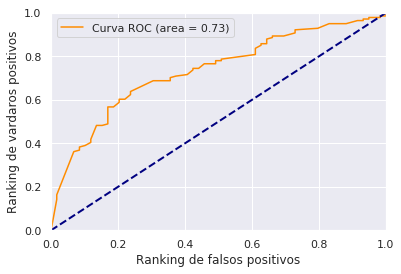

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=13, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [395]:
params = {}

params1={
    'n_estimators':3000,
    'objective': 'binary:logistic',
    'learning_rate': 0.01,
    'max_depth':3,
    'n_jobs' : 4
}

xgbclf(params,X_train_clean[importance_col], y_train_clean,X_test_clean[importance_col], y_test_clean)

Vemos que al selcccionar variables tampoco mejora mucho el modelo por lo que nos quedaremos con el modelo de 61 variavles.

### GridSearchCV 
Esto lo que hace es buscar el mejor modelo que pasandole multipes parametros de entrada.COmo esta forma de hacerlo es un poco mas compleja hare crossvalidation con el kfold y calculare el mejor utilizando el area bajo la curva

In [400]:
from sklearn.model_selection import GridSearchCV

print('XGBoost with grid search')

params={
    'learning_rate': [0.01, 0.02],
    'max_depth': [3,5], 
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'reg_alpha': [0.02, 0.03, 0.04] 
}


xgb_clf = xgb.XGBClassifier()
kfold = KFold(n_splits=6, random_state=2012)
rs = GridSearchCV(xgb_clf,
                  params,
                  cv=kfold,
                  scoring="roc_auc",
                  n_jobs=1,
                  verbose=False)
rs.fit(X_train_clean[importance_col], y_train_clean)
best_est = rs.best_estimator_
print(best_est)

# Test 
print(rs.score(X_test_clean[importance_col],y_test_clean))



XGBoost with grid search
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.02, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
0.7119846135352806


### Lighgbm


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) 



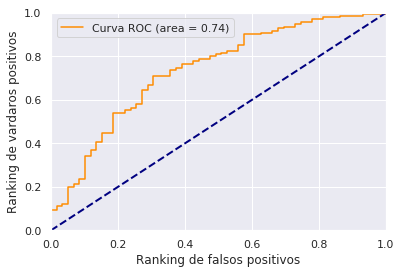

In [404]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import lightgbm as lgb

def lgbclf(X_train, y_train,X_test, y_test):

    model = lgb.LGBMClassifier().fit(X_train, y_train)
    print(model,'\n')

    # Predecimos 
    y_pred = model.predict_proba(X_test)[:,1]
    
    

    # Utilizamos la validazion cruzada.

    get_roc (y_test,y_pred)
    return

# Regrasion Logistica
#lgbclf(X_train, y_train,X_test,y_test)
lgbclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

### LogisticRegression 

LogisticRegression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 



/home/xus/PycharmProjects/machine-learning/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


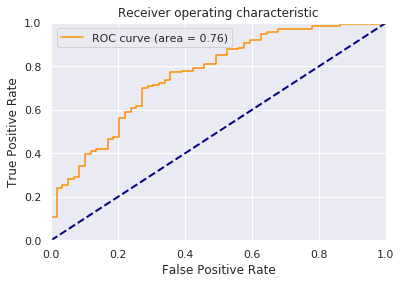

In [50]:
from sklearn.linear_model import LogisticRegression


def logregclf(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    model = LogisticRegression().fit(X_train, y_train)
    print(model,'\n')

    # Predecimos
    y_pred = model.predict_proba(X_test)[:,1]

   # Utilizamos la validazion cruzada.
    #get_eval(model, X_train, y_train,y_test,y_pred)
    #get_eval2(model, X_train, y_train,X_test, y_test,y_pred)
    get_roc (y_test,y_pred)
    return

# Logistic Regression
#logregclf(X_train, y_train,X_test,y_test)
logregclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

### RandomForest 

RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 



/home/xus/PycharmProjects/machine-learning/venv/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


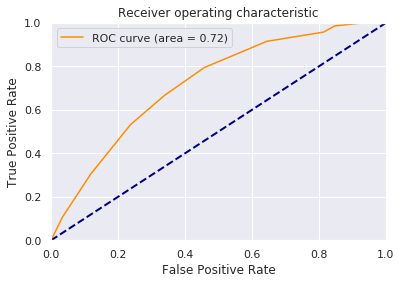

In [51]:
from sklearn.ensemble import RandomForestClassifier 

def randomforestclf(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)
    print(randomforest,'\n')
    
    # Predict target variables y for test data
    y_pred = randomforest.predict_proba(X_test)[:,1]

    # Utilizamos la validazion cruzada.
    #get_eval(randomforest, X_train, y_train,y_test,y_pred)
    get_roc (y_test,y_pred)
    return

# Random Forest
# Elegimos el arbol mas robusto
randomforestclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

### ExtraTreesClassifier

ExtraTreesClassifier
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False) 



/home/xus/PycharmProjects/machine-learning/venv/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


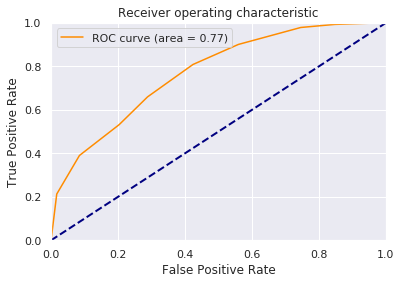

In [53]:
from sklearn.ensemble import ExtraTreesClassifier

def extratreesclf(X_train, y_train,X_test, y_test):
    print("ExtraTreesClassifier")
    extratrees = ExtraTreesClassifier().fit(X_train, y_train)
    print(extratrees,'\n')
    
    # Predecimos 
    y_pred = extratrees.predict_proba(X_test)[:,1]

    # Utilizamos la validazion cruzada.
    #get_eval(extratrees, X_train, y_train,y_test,y_pred)
    
    get_roc (y_test,y_pred)
    return
 
# Elegimos muchos arblos y elegimos el mas robusto
# Choose clean data, as tree is robust
extratreesclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

### DecisionTreeClassifier 

DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 



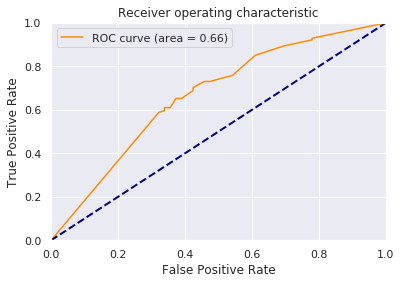

In [52]:
from sklearn.tree import DecisionTreeClassifier 
def dectreeclf(X_train, y_train,X_test, y_test):
    print("DecisionTreeClassifier")
    dec_tree = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=5).fit(X_train, y_train)
    print(dec_tree,'\n')
    
    y_pred = dec_tree.predict_proba(X_test)[:,1]

    
    # Utilizamos la validazion cruzada.
    #get_eval(dec_tree, X_train, y_train,y_test,y_pred)
    get_roc (y_test,y_pred)
    return

# Arbol de decision
dectreeclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

### GradientBoostingClassifier 

GradientBoostingClassifier
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

Validacion cruzada: 0.77 (+/- 0.04)


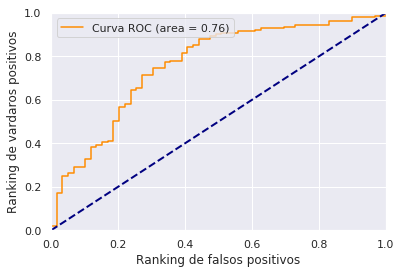

In [420]:
from sklearn.ensemble import GradientBoostingClassifier

# fit, train and cross validate GradientBoostingClassifier with training and test data 
def gradientboostingclf(X_train, y_train, X_test, y_test):  
    print("GradientBoostingClassifier")
    gbclf = GradientBoostingClassifier().fit(X_train, y_train)
    print(gbclf,'\n')
    
    y_pred = gbclf.predict_proba(X_test)[:,1]

    # Utilizamos la validazion cruzada.
    get_eval(gbclf, X_train, y_train)
    get_roc (y_test,y_pred)
    return
  
# GradientBoostingClassifier
gradientboostingclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

### AdaBoostClassifier 

AdaBoostClassifier
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) 

Validacion cruzada: 0.76 (+/- 0.03)


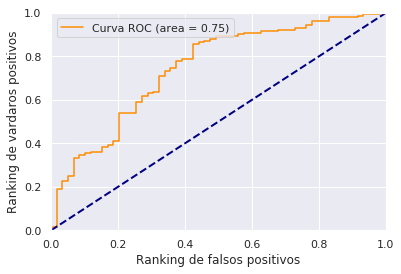

In [425]:
from sklearn.ensemble import AdaBoostClassifier


def adaboostclf(X_train, y_train, X_test, y_test):  
    print("AdaBoostClassifier")
    abclf = AdaBoostClassifier().fit(X_train, y_train)
    print(abclf,'\n')
    y_pred = abclf.predict(X_test)
    get_eval(abclf, X_train, y_train)
    
    
    y_pred_prob = abclf.predict_proba(X_test)[:,1]
    get_roc (y_test,y_pred_prob)
    return

adaboostclf(X_train_clean, y_train_clean,X_test_clean, y_test_clean)

SVMClassifier
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 



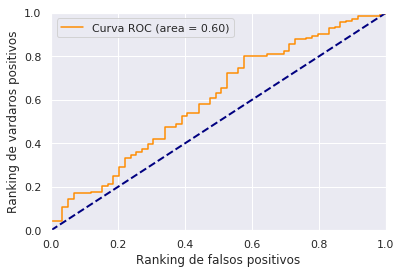

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [427]:
from sklearn import svm


def svmClassifier(X_train, y_train, X_test, y_test):  
    print("SVMClassifier")
    svModel = svm.SVC(gamma='scale', probability=True,decision_function_shape='ovr')
    svclf = svModel.fit(X_train, y_train)
    print(svclf,'\n')
     
    y_pred = svclf.predict_proba(X_test)[:,1]
    
    get_roc (y_test,y_pred)
    get_eval(svclf, X_train, y_train)
  
    return




svmClassifier(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


def bagClassifier(X_train, y_train, X_test, y_test):  
    bBmodel = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=5)
    
    print("BagClassifier")
    bagModel =  BaggingClassifier(base_estimator=bBmodel, n_estimators=200, random_state=1023)
    bagclf = bagModel.fit(X_train, y_train)
    y_pred = bagclf.predict_proba(X_test)[:,1]
    get_roc (y_test,y_pred)
    print(y_pred)
    return




bagClassifier(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)
bagClassifier(X_train_clean_labeled, y_train_clean_labeled,X_test_clean_labeled, y_test_clean_labeled)

nnClassifier
MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500, 200, 10, 3), learning_rate='adaptive',
              learning_rate_init=0.0001, max_iter=1000, momentum=0.8,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False) 

[0.61968944 0.61968945 0.61968943 0.61968939 0.61968945 0.61968944
 0.61968946 0.61968945 0.61968943 0.61968943 0.61968943 0.61968943
 0.61968943 0.61968939 0.61968921 0.61968947 0.61968948 0.61968939
 0.61968852 0.61968925 0.61968946 0.61968939 0.61968945 0.61968935
 0.61968946 0.61968943 0.6196895  0.61968867 0.61968943 0.61968938
 0.61968943 0.61968941 0.61968943 0.61968887 0.61968944 0.61968949
 0.61968944 0.61968943 0.61968943 0.61968947 0.61968869 0.61968938
 0

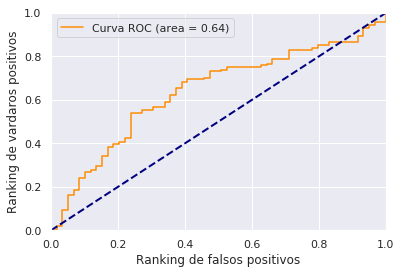

In [416]:
from sklearn.neural_network import MLPClassifier

def nnClassifier(X_train, y_train, X_test, y_test):  
    print("nnClassifier")
    nnModel =  MLPClassifier(activation='logistic', max_iter=1000, hidden_layer_sizes=(500,200,10,3),early_stopping=False,
                             momentum=0.8,learning_rate='adaptive', learning_rate_init=0.0001)
    nnclf = nnModel.fit(X_train, y_train)
    print(nnclf,'\n')

    y_pred = nnclf.predict_proba(X_test)[:,1]
    
    print(y_pred)
    get_roc (y_test,y_pred)

  
    return





nnClassifier(X_train_clean_labeled, y_train_clean_labeled,X_test_clean_labeled, y_test_clean_labeled)

knnClassifier
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform') 

[0.28571429 0.14285714 0.71428571 0.42857143 0.42857143 0.28571429
 0.57142857 0.         0.57142857 0.57142857 0.14285714 0.42857143
 0.57142857 1.         0.71428571 0.42857143 0.28571429 0.71428571
 0.57142857 0.57142857 0.42857143 0.57142857 0.71428571 0.
 0.28571429 0.42857143 0.71428571 0.85714286 0.85714286 0.
 0.42857143 0.14285714 0.         0.57142857 0.85714286 0.28571429
 0.42857143 0.71428571 0.85714286 0.57142857 0.28571429 0.85714286
 0.57142857 0.71428571 0.57142857 0.         0.57142857 0.71428571
 0.85714286 1.         0.14285714 0.71428571 0.42857143 0.85714286
 0.71428571 0.71428571 0.42857143 1.         0.57142857 0.57142857
 0.71428571 0.57142857 0.         0.71428571 0.71428571 0.28571429
 0.28571429 0.71428571 0.42857143 0.14285714 0.42857143 0.42857143
 1.      

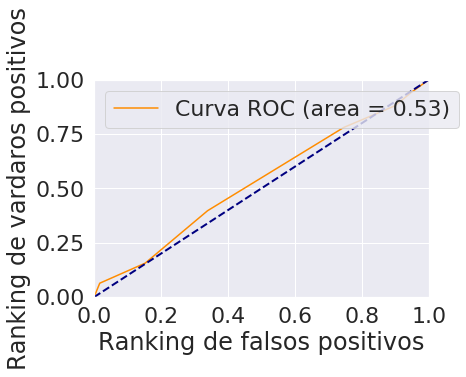